#### Why Data Cleaning is Important
Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. It is a commonly known fact that data scientists spend 80% of their time cleaning, manipulating and transforming data into the shape they want in order to carry out accurate analysis.

##### Some common problems with data:
- Column headers are variables, not variable names
- Multiple variables are stored in one column
- Variables are stored in both rows and columns
- Multiple types of observational units are stored in the same table
- A single observational unit stored in multiple tables

In this project efforts will be made to deal with and overcome some common untidy data problems.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset into a dataframe called ride_sharing
ride_sharing = pd.read_csv('../Datasets/ride_sharing_new.csv')
#Viewing the first 3 rows of the dataset
ride_sharing.head(3)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male


The dataset above is a bicycle ride sharing data from San Francisco. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

- 1 for free riders.

- 2 for pay per ride.

- 3 for monthly subscribers.  

In [3]:
#Printing information about the ride_sharing dataset
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


It can be observed that the dataset has 10 columns 25760 rows and mixed data types. The user_type column should be categorical and nto integer.

In [4]:
#Summary statistics of the user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


The Summary Statistics shown above is not very informative.

In [5]:
#Converting the user_type column to category and storing it in a new column 'user_type_cat'
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

#Confirming the change with an assert statement. The assert statement will return nothing if the assertion is true and an error otherwise
assert ride_sharing['user_type_cat'].dtype == 'category'

print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


The Summary Statistics printed now is more useful because it gives the following information:
- there 3 unique categories
- the most occuring categoriy is 2 and it occurs 12972 times

In [6]:
#Looking at the 'duration' column in the dataset (first 5 rows)
ride_sharing['duration'][0:5]

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: object

It is observed that the duration is measured in minutes and as data scientist we would perhaps want to perform some numerical computations as finding the mean or the sum. This will not be possible because the column is saved with a string data type. In order to recode the column to a numeralcal one, the 'minutes' string needs to stripped off.

In [7]:
#Stripping off the minutes in the duration column and saving it in a new column 'duration_trim'
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

#Convert the new column into one with dtype of integer 
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

#Confirming the change with an assert statement
assert ride_sharing['duration_time'].dtype == 'int'

print(ride_sharing['duration_time'][0:5])
print('The average duration time is {:.2f} minutes'.format(np.mean(ride_sharing['duration_time'])))

0    12
1    24
2     8
3     4
4    11
Name: duration_time, dtype: int64
The average duration time is 11.39 minutes


##### We later received some extra data on the bicycle tire sizes, and this is stored in a list in other file. This list must be added as a colum to our dataset. The name of the file is extra.py

In [8]:
#Importing the file 
from extras import tire_sizes

ride_sharing['tire_sizes'] = tire_sizes
ride_sharing['tire_sizes'][0:5]

0    29
1    27
2    26
3    27
4    29
Name: tire_sizes, dtype: int64

In [9]:
#Printing information about the ride_sharing dataset
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int64   
 13  tire_sizes       25760 non-null  int64   
dtypes: category(1), int64(8), object(5)
memory usage: 2.6+ MB
None


In [10]:
#Converting tire sizes dtype to category
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

#Confirming the change with an assert statement
assert ride_sharing['tire_sizes'].dtype == 'category'

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″. Let's select bicycles with tire sizes above 27 and set them to 27. But before that can be done we need to convert the data type of the tire sizes column to integer

In [11]:
# Converting tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27
print(ride_sharing[ride_sharing['tire_sizes'] > 27])

Empty DataFrame
Columns: [Unnamed: 0, duration, station_A_id, station_A_name, station_B_id, station_B_name, bike_id, user_type, user_birth_year, user_gender, user_type_cat, duration_trim, duration_time, tire_sizes]
Index: []


In [12]:
# Reconverting tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

print('The different tire sizes present are {}'.format(ride_sharing['tire_sizes'].unique()))

count     25760
unique        2
top          27
freq      19458
Name: tire_sizes, dtype: int64
The different tire sizes present are [27, 26]
Categories (2, int64): [27, 26]


##### The extras file has again been updated with the date and time information for each ride. It is required that this new information is incorporated in the dataset as a new column.  The dates were randomly generated for the sake of learning. The code for generating the random dates is in the next cell

In [13]:
import random
from datetime import datetime, timedelta

random.seed(10)
min_year=2017
max_year=datetime.now().year

start = datetime(min_year, 1, 1, 00, 00, 00)
years = max_year - min_year+2
end = start + timedelta(days=365 * years)

dates_list = []
for i in range(25760):
    random_date = start + (end - start) * random.random()
    dates_list.append(random_date)
    
date_strings = []
for date in dates_list:
    date_string = date.strftime('%m-%d-%Y')
    date_strings.append(date_string)

In [14]:
#Saving the date time information in a column called 'ride_date'
ride_sharing['ride_date'] = date_strings
ride_sharing.head(4)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes,ride_date
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,27,06-05-2020
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,27,07-29-2019
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,26,06-20-2020
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,27,03-28-2018


A bug was discovered where all rides taken today were recorded as taken next year. To remedy this we will go through the new column, select all dates in the future and set them to today.

In [15]:
import datetime as dt
# Convert ride_date to datetime
ride_sharing['ride_date'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = pd.Timestamp('today')

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_date'] > today, 'ride_date'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_date'].max())
print(today)

2021-03-26 13:41:05.941062
2021-03-26 13:41:05.941062


In [16]:
ride_sharing.head(3)

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes,ride_date
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,27,2020-06-05
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,27,2019-07-29
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,26,2020-06-20


As can be seen there are columns that are no longer needed in the dataset. We have to drop them.

In [17]:
#Dropping the unnecessary columns
cols_to_go = ['Unnamed: 0', 'user_type', 'duration_trim']
ride_sharing.drop(cols_to_go, axis = 1, inplace = True)

In [18]:
#ride_sharing['user_type'] = ride_sharing['user_type_cat']
ride_sharing.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,27,2019-07-29
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,1993,Male,3,8,26,2020-06-20


The client asked for analysis to be done only on 78 users and also provided ride ids with updated user birth years, duration time. The ride ids and the updated user birth years have been provided in the extras file.

In [19]:
#Selecting 78 the first 78 rows
ride_sharing_sub = ride_sharing.loc[0:77, :].copy()
ride_sharing_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   duration         78 non-null     object        
 1   station_A_id     78 non-null     int64         
 2   station_A_name   78 non-null     object        
 3   station_B_id     78 non-null     int64         
 4   station_B_name   78 non-null     object        
 5   bike_id          78 non-null     int64         
 6   user_birth_year  78 non-null     int64         
 7   user_gender      78 non-null     object        
 8   user_type_cat    78 non-null     category      
 9   duration_time    78 non-null     int64         
 10  tire_sizes       78 non-null     category      
 11  ride_date        78 non-null     datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(5), object(4)
memory usage: 6.6+ KB


In [20]:
ride_sharing_sub.head(2)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_birth_year,user_gender,user_type_cat,duration_time,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,1959,Male,2,12,27,2020-06-05
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,1965,Male,2,24,27,2019-07-29


In [21]:
#Dropping columns that have been updated so that we can insert the updates as new columns
cols_to_del = ['user_birth_year', 'duration_time', 'duration']
ride_sharing_sub.drop(cols_to_del, axis = 1, inplace = True)

In [22]:
ride_sharing_sub.head(3)

,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_type_cat,tire_sizes,ride_date
0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,2,27,2020-06-05
1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,2,27,2019-07-29
2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Male,3,26,2020-06-20


In [23]:
ride_sharing_sub.columns

Index(['station_A_id', 'station_A_name', 'station_B_id', 'station_B_name',
       'bike_id', 'user_gender', 'user_type_cat', 'tire_sizes', 'ride_date'],
      dtype='object')

In [24]:
#importing the updates from the extras file
from extras import ids, duration, birth_year 

#Inserting the new ids as a column into the dataset in location 0
ride_sharing_sub.insert(loc = 0, column = 'ride_id', value = ids)

#Updating the duration time with the new values 
ride_sharing_sub.insert(loc = 8, column = 'duration', value = duration)

#Updating the user birth years with the updated birth years
ride_sharing_sub.insert(loc = 7, column = 'user_birth_year', value = birth_year)

In [25]:
ride_sharing_sub.head(2)

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
0,0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,1988,2,11,27,2020-06-05
1,1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,1988,2,8,27,2019-07-29


The updates provided by the file however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In [26]:
# Find duplicates
duplicates = ride_sharing_sub.duplicated(subset = 'ride_id', keep = False)
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74     True
75     True
76     True
77     True
Length: 78, dtype: bool


In [27]:
# Sort your duplicated rides
duplicated_rides = ride_sharing_sub[duplicates].sort_values(by = 'ride_id')
duplicated_rides.head()

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
22,33,5,Powell St BART Station (Market St at 5th St),356,Valencia St at Clinton Park,2165,Male,1979,2,10,27,2017-10-19 00:00:00.000000
39,33,30,San Francisco Caltrain (Townsend St at 4th St),130,22nd St Caltrain Station,5213,Male,1979,1,2,27,2021-03-26 13:41:05.941062
53,55,21,Montgomery St BART Station (Market St at 2nd St),78,Folsom St at 9th St,1502,Female,1985,2,9,27,2017-09-05 00:00:00.000000
65,55,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5392,Male,1985,2,9,27,2017-09-19 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,26,2017-01-11 00:00:00.000000


In [28]:
# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


In [29]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing_sub.drop_duplicates()
ride_dup[ride_dup.duplicated(subset = 'ride_id', keep = False)]

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
22,33,5,Powell St BART Station (Market St at 5th St),356,Valencia St at Clinton Park,2165,Male,1979,2,10,27,2017-10-19 00:00:00.000000
39,33,30,San Francisco Caltrain (Townsend St at 4th St),130,22nd St Caltrain Station,5213,Male,1979,1,2,27,2021-03-26 13:41:05.941062
53,55,21,Montgomery St BART Station (Market St at 2nd St),78,Folsom St at 9th St,1502,Female,1985,2,9,27,2017-09-05 00:00:00.000000
65,55,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5392,Male,1985,2,9,27,2017-09-19 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,26,2017-01-11 00:00:00.000000
75,71,21,Montgomery St BART Station (Market St at 2nd St),58,Market St at 10th St,316,Female,1997,2,11,27,2021-03-26 13:41:05.941062
76,89,22,Howard St at Beale St,72,Page St at Scott St,5162,Female,1986,2,9,27,2018-12-28 00:00:00.000000
77,89,21,Montgomery St BART Station (Market St at 2nd St),64,5th St at Brannan St,1299,Male,2060,2,9,27,2018-12-01 00:00:00.000000


In [30]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
ride_unique

,ride_id,user_birth_year,duration
0,0,1988,11
1,1,1988,8
2,2,1988,11
3,3,1969,7
4,4,1986,11
...,...,...,...
69,94,1993,25
70,95,1959,11
71,96,1991,7
72,98,1989,21


In [31]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

There is a user with birth year set as 2060. It was found out that his actual birth year is 1992.

In [32]:
#Setting the birth year from 2060 to 1992
ride_sharing_sub.loc[ride_sharing_sub['user_birth_year'] == 2060, 'user_birth_year'] = 1992

In [33]:
ride_sharing_sub.tail()

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date
73,99,3,Powell St BART Station (Market St at 4th St),6,The Embarcadero at Sansome St,443,Female,1968,1,15,26,2019-08-11 00:00:00.000000
74,71,67,San Francisco Caltrain Station 2 (Townsend St...,90,Townsend St at 7th St,1920,Male,1997,2,11,26,2017-01-11 00:00:00.000000
75,71,21,Montgomery St BART Station (Market St at 2nd St),58,Market St at 10th St,316,Female,1997,2,11,27,2021-03-26 13:41:05.941062
76,89,22,Howard St at Beale St,72,Page St at Scott St,5162,Female,1986,2,9,27,2018-12-28 00:00:00.000000
77,89,21,Montgomery St BART Station (Market St at 2nd St),64,5th St at Brannan St,1299,Male,1992,2,9,27,2018-12-01 00:00:00.000000


The Dataset is now clean for analysis

In [34]:
ride_sharing_sub['duration'].max()

68

#### Analysing The Data Set for Insights

Now that the dataset is clean, we can perform some analysis on it to gain some insights. Some the questions that can be asked of the data include:
- What are the ages of the riders (The oldest and youngest riders)
- Which stations are popular (have the most rides starting from there or ending there)
- What age group of riders have the more rides
- Which days of the week are the busiest ( also which months)
- Which bikes have had more rides.

All these questions can be answered and that is what I will do in the next few cells and in no particular order.

##### User Ages
The user ages can be calculated by subtracting their birth years from the current year. This can be done using a `lambda` function to create a new column called `user_age`. 

In [35]:
#Calculating user ages
ride_sharing_sub['user_age'] = ride_sharing_sub.apply(lambda row: today.year - row['user_birth_year'], axis = 1)

In [36]:
ride_sharing_sub.head(3)

,ride_id,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year,user_type_cat,duration,tire_sizes,ride_date,user_age
0,0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Male,1988,2,11,27,2020-06-05,33
1,1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Male,1988,2,8,27,2019-07-29,33
2,2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Male,1988,3,11,26,2020-06-20,33


In [44]:
#General statistics of the ages of the riders
user_ages = ride_sharing_sub['user_age'].values
mean_age = np.mean(user_ages)
youngest_age = np.min(user_ages)
oldest_age = np.max(user_ages)
print('The average age of the riders is {:.2f}'.format(mean_age))
print('The youngest rider is {} years old'.format(youngest_age))
print('The oldest rider is {} years old'.format(oldest_age))

The average age of the riders is 37.37
The youngest rider is 24 years old
The oldest rider is 79 years old


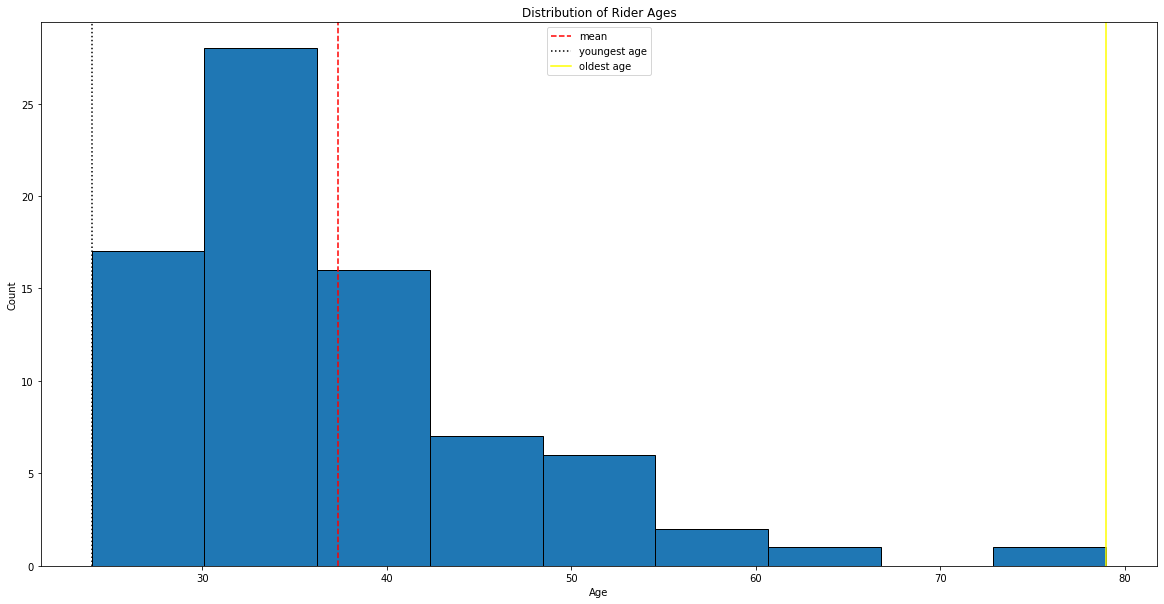

In [61]:
#Setting the number of bins for the histogram
n_bins = round(np.sqrt(len(user_ages)))
#Plotting the age distributions
plt.figure(figsize = (20, 10))
plt.hist(user_ages, edgecolor = 'black', bins = n_bins)
plt.axvline(mean_age, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(youngest_age, color = 'black', label = 'youngest age', linestyle = 'dotted')
plt.axvline(oldest_age, color = 'yellow', label = 'oldest age', linestyle = 'solid')
plt.title('Distribution of Rider Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

###### Most Popular Stations
We can also look into the dataset to find out which of the stations are popular. 
- Which Starting station (Station A)  is more popular?
- Which starting station (Station B) is more popular?

In [65]:
#Finding all the different starting stations
number_of_starting_stations = ride_sharing_sub['station_A_name'].nunique()
print('The number of starting stations is: ' + str(number_of_starting_stations))

The number of starting stations is: 9


In [72]:
#The names of the starting stations
names_of_starting_stations = ride_sharing_sub['station_A_name'].unique()
print('The names of starting stations are: \n{}'.format(names_of_starting_stations))

The names of starting stations are: 
['Berry St at 4th St' 'Powell St BART Station (Market St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'Steuart St at Market St' 'Howard St at Beale St'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 5th St)']


In [ ]:
#Finding all the different final stations
number_of_starting_stations = ride_sharing_sub['station__name'].nunique()
print('The number of starting stations is: ' + str(number_of_starting_stations))